# OBJECTIVE 

The objective of this project is to develop and compare multiple machine learning classification models to predict whether a customer will churn using the Telco Customer Churn dataset. Accurately predicting churn is important because it enables telecommunication companies to identify customers at high risk of leaving and implement proactive retention strategies.

To achieve this, I will begin with a detailed exploratory data analysis (EDA) to understand the dataset structure, identify key patterns, and explore relationships among variables that may influence churn.

Following EDA, I will build and evaluate three different classification models:

- K-Nearest Neighbors (KNN)

- Gradient Boosting Classifier (GBC)

- Deep Learning Model (Multi-Layer Perceptron / Neural Network)

Before model building, appropriate preprocessing steps such as encoding, scaling, and handling class imbalance will be performed. Each model will then undergo hyperparameter tuning and cross-validation to improve performance in a systematic and statistically meaningful way.

Model performance will be compared using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Finally, results will be interpreted in the context of customer behavior, and the findings will be connected back to the overall objective of predicting and understanding customer churn.

In [1]:
# loading the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA 

In [3]:
# Basic info
df.shape
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# converting string to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\meena\AppData\Local\Temp\ipykernel_16556\27540549.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [5]:
# Numeric and Categorical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

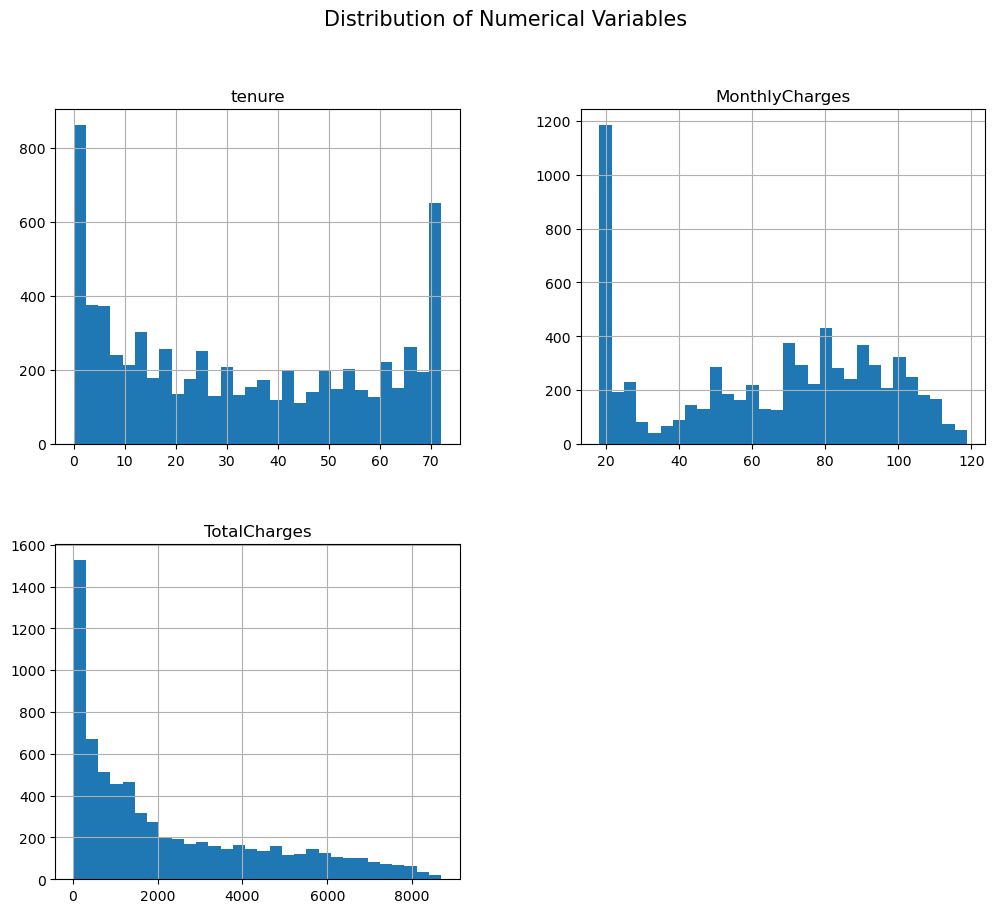

In [6]:
# Distribution of Numerical Variables
df[num_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribution of Numerical Variables", fontsize=15)
plt.show()


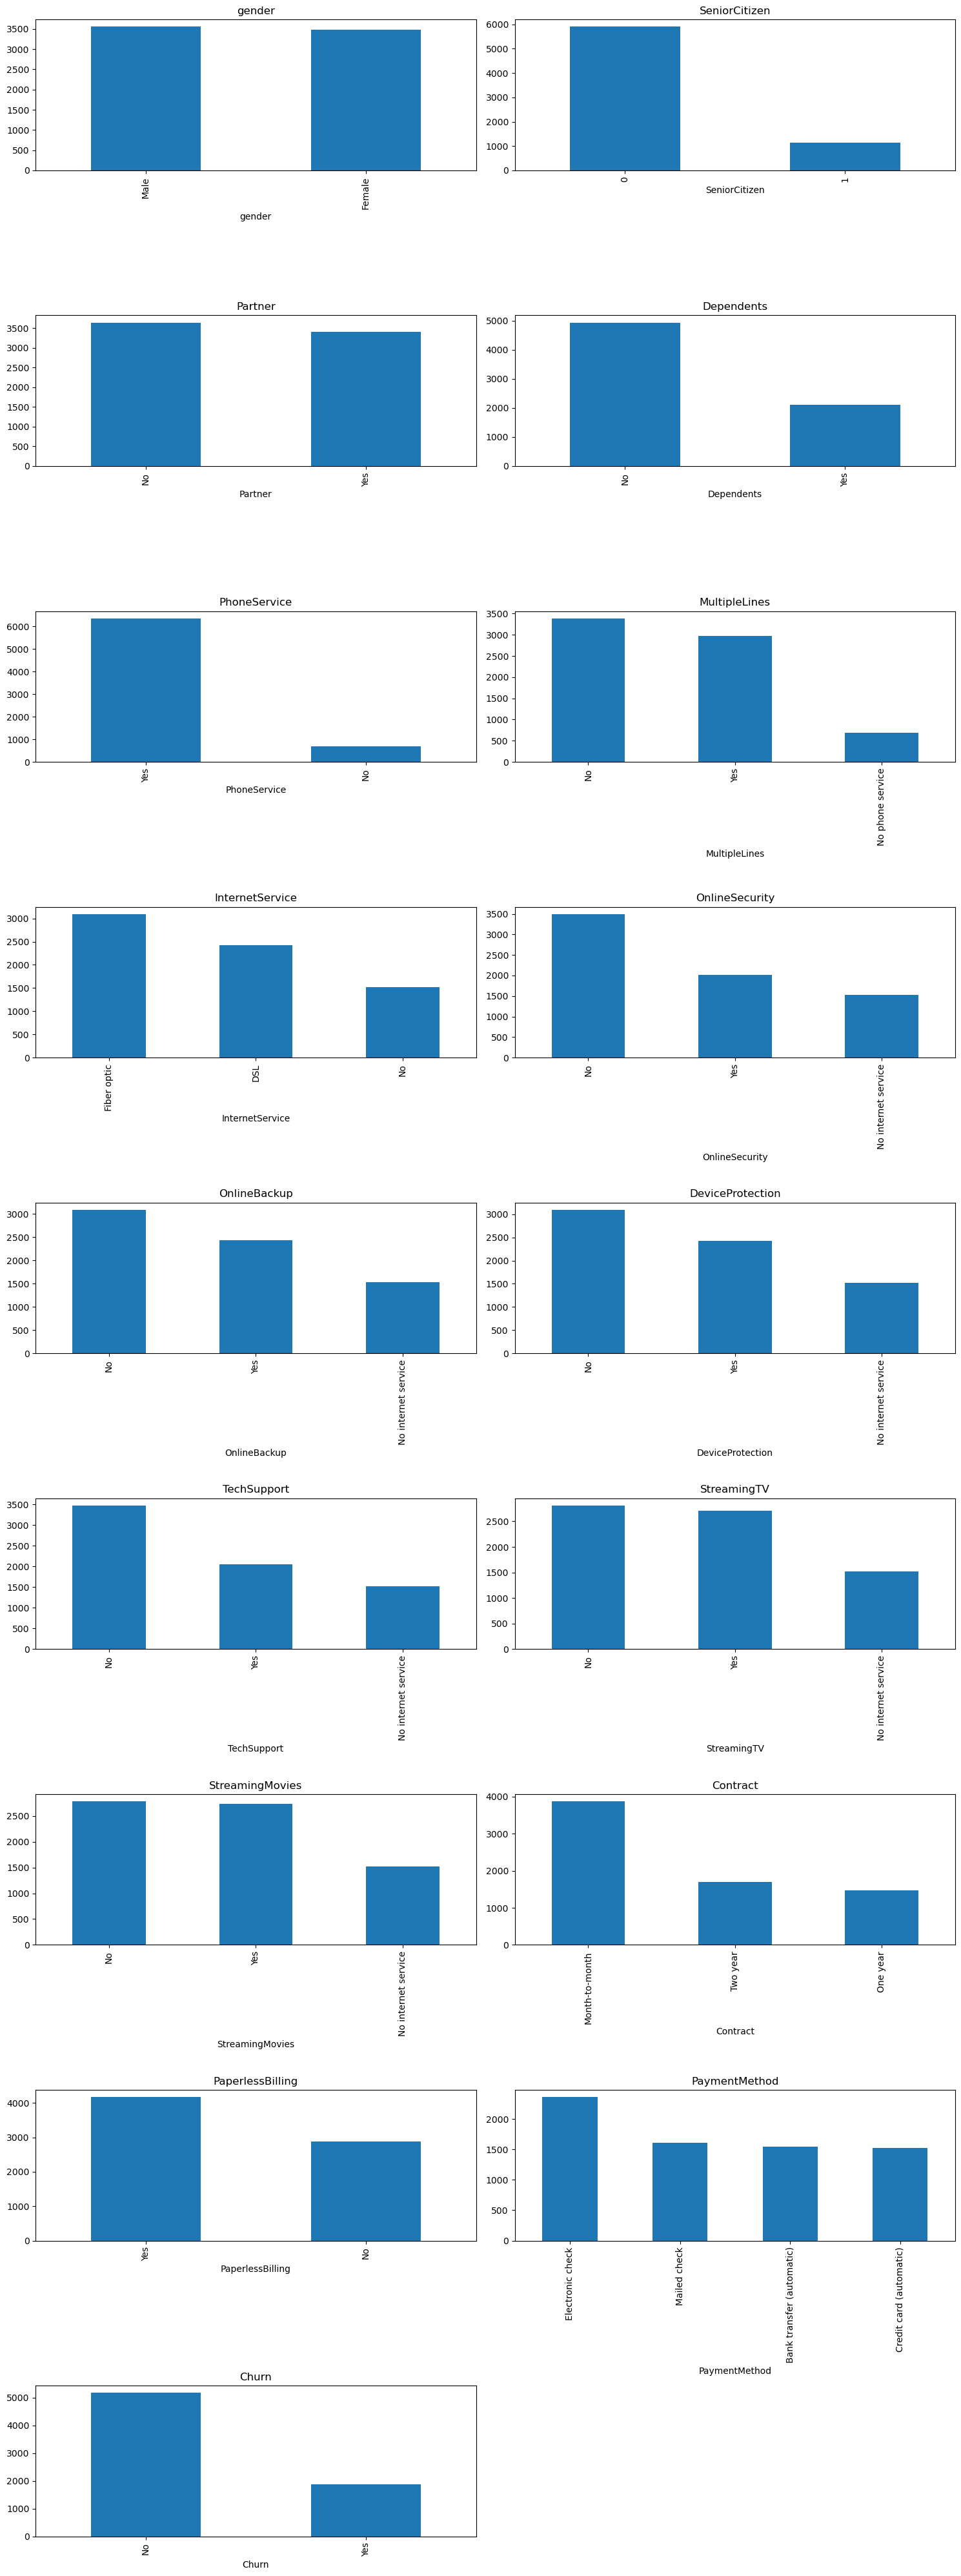

In [7]:
# Distribution of categorical variables 

plt.figure(figsize=(15, 40))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols) // 2 + 1, 2, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.tight_layout()


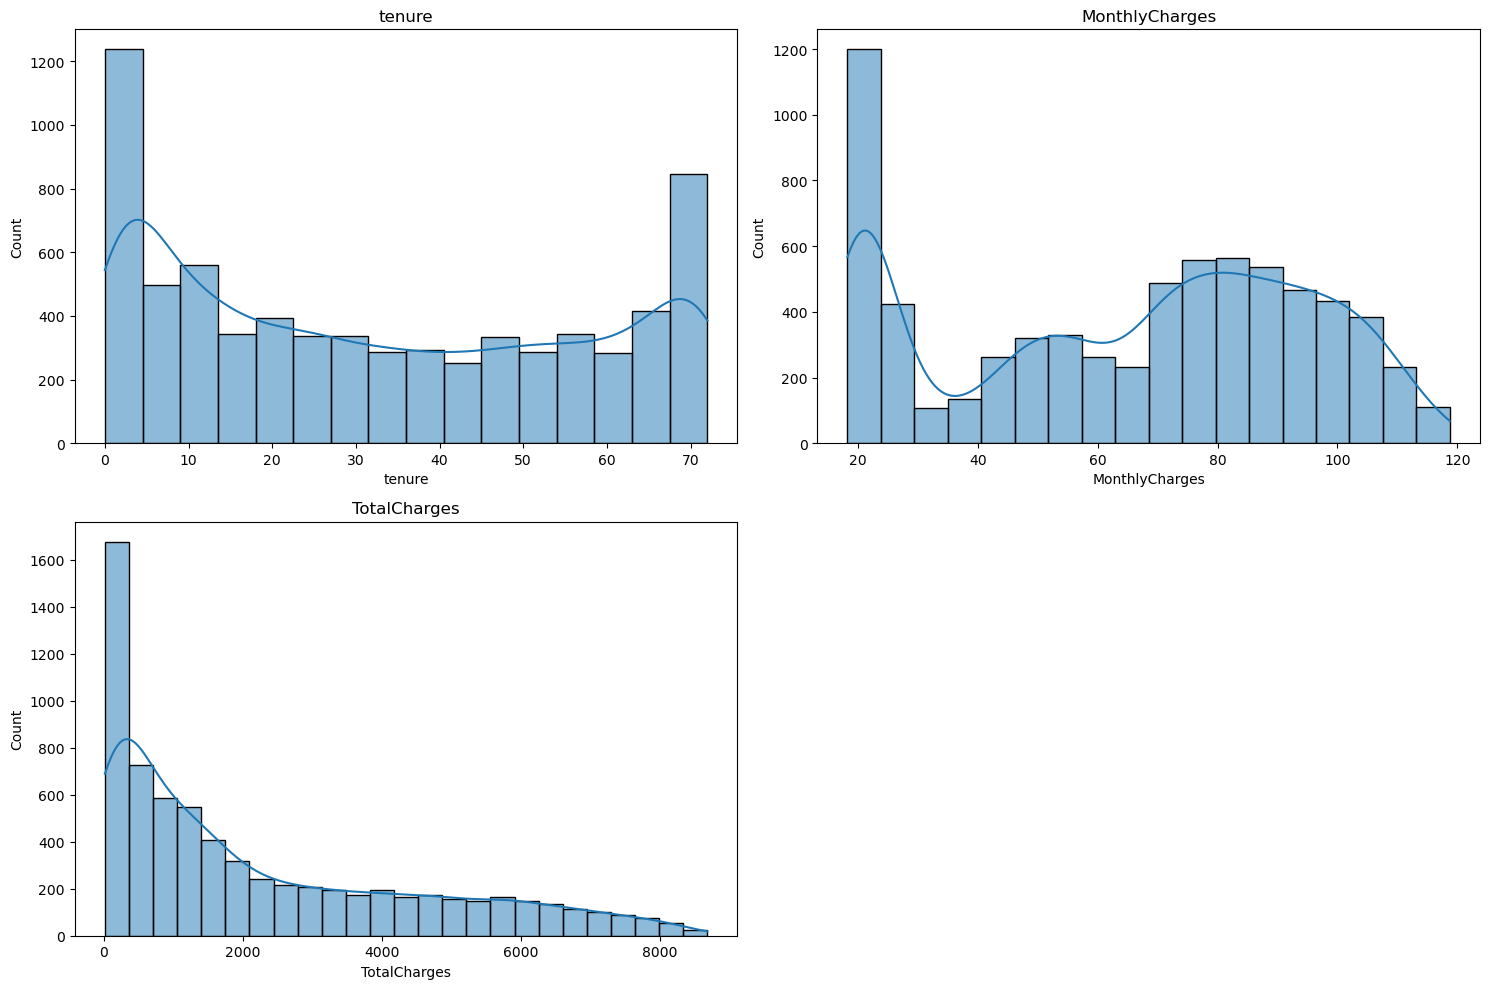

In [8]:
#Numeric variables histogram with KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

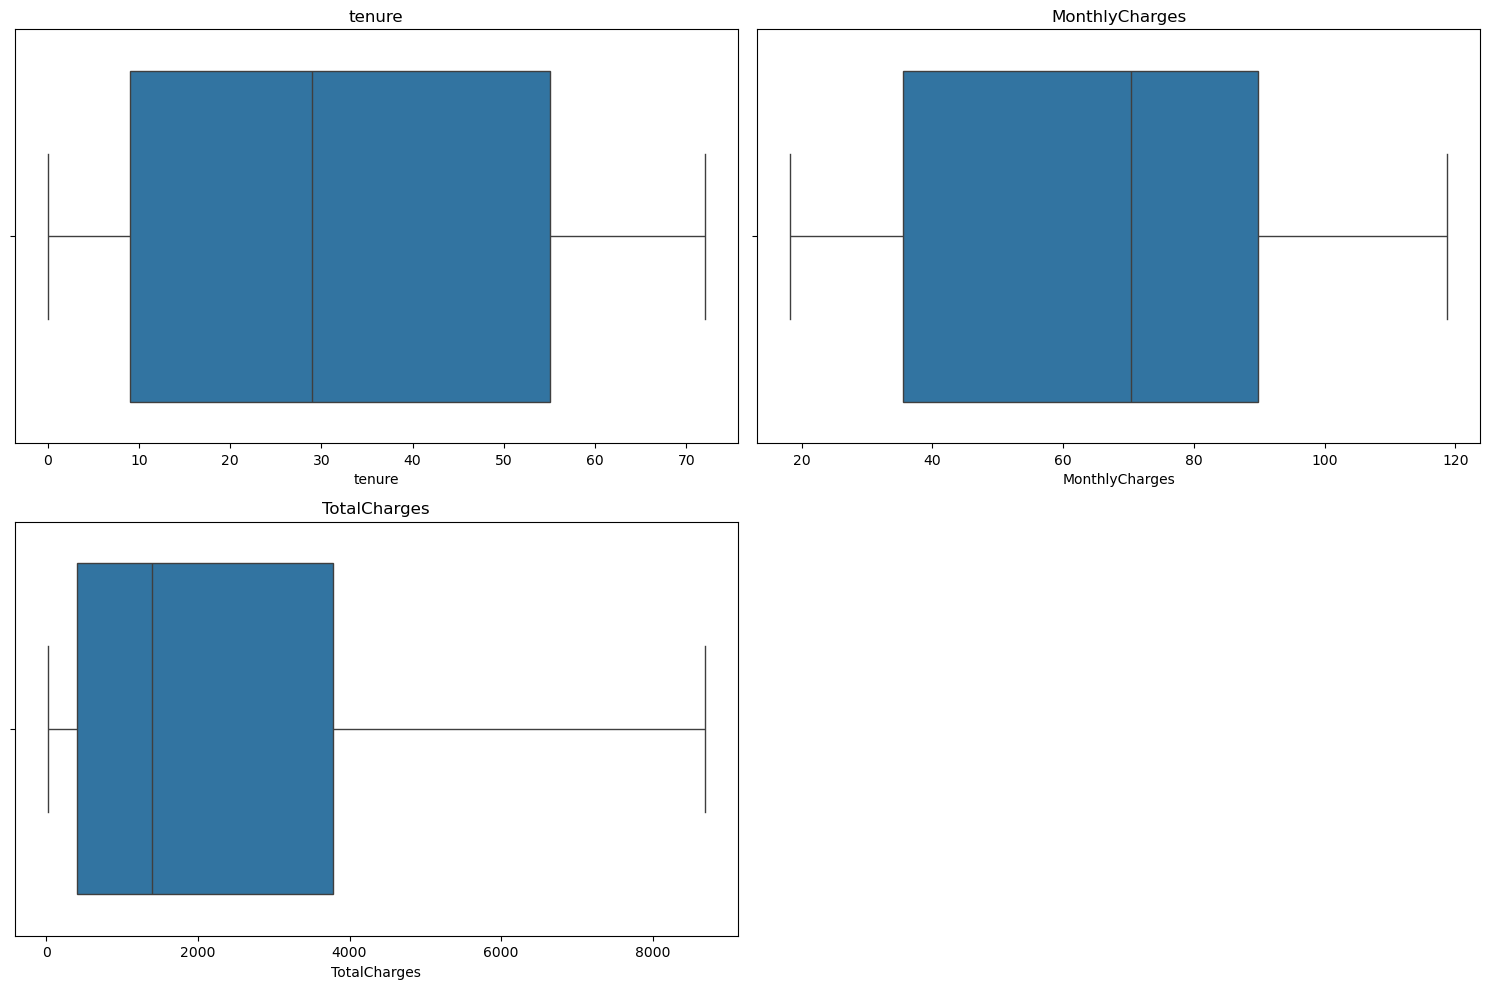

In [9]:
# box plots for numeric variable 
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

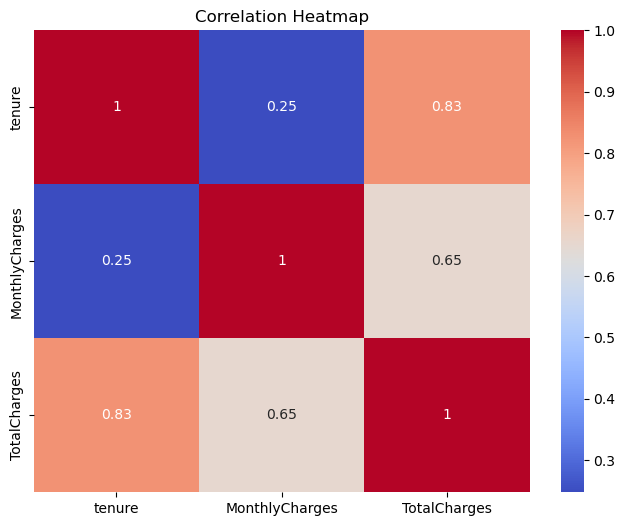

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

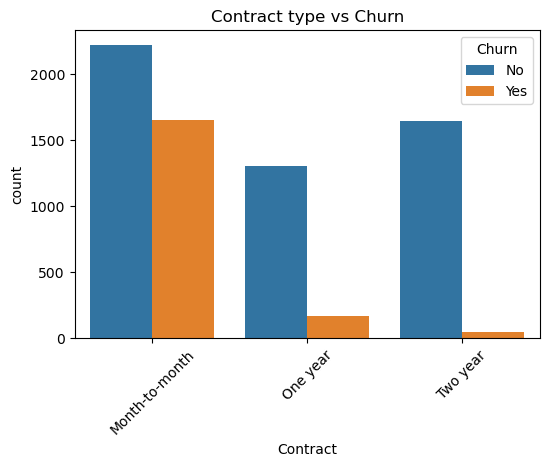

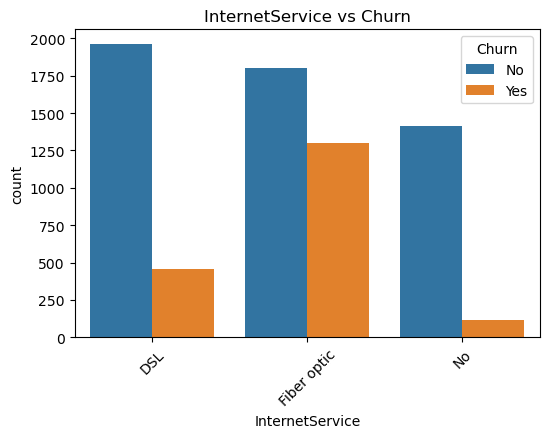

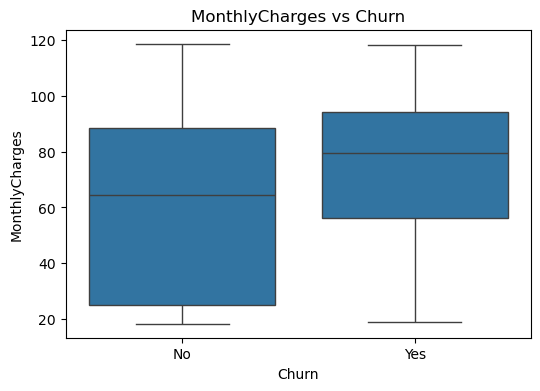

In [11]:
# Churn Relationship Plots

#Churn vs Contract
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Contract type vs Churn")
plt.xticks(rotation=45)
plt.show()

#Churn vs Internet Service
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("InternetService vs Churn")
plt.xticks(rotation=45)
plt.show()

#Churn vs Monthly Charges (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("MonthlyCharges vs Churn")
plt.show()

In [12]:
# Preprocessing

# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Convert Churn to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Identify categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling']

multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# Label Encoding for binary categories
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Count of services before OHE
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']

df['ServicesCount'] = df[service_cols].apply(lambda x: (x=='Yes').sum(), axis=1)


# One-Hot Encoding for multi-category columns
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# Final check
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [13]:
# Feature Engineering

# Customer Tenure Buckets (binning)
df['Tenure_Bucket'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, np.inf],
    labels=['0-1yr', '1-2yr', '2-4yr', '4+yr']
)

# Total Charges to Monthly Charges Ratio
df['TotalChargeRatio'] = df['TotalCharges'] / (df['MonthlyCharges'] + 1)

# Interaction Terms for Important Predictors
df['Monthly_Tenure_Interaction'] = df['MonthlyCharges'] * df['tenure']

# Log Transform Skewed Variables
df['Log_MonthlyCharges'] = np.log(df['MonthlyCharges'] + 1)

# Scaling Using StandardScaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure', 'ServicesCount',
            'TotalChargeRatio', 'Monthly_Tenure_Interaction']

df[num_cols] = scaler.fit_transform(df[num_cols])

# One-hot encode Tenure_Bucket
df = pd.get_dummies(df, columns=['Tenure_Bucket'], drop_first=True)

In [14]:
# Variable selection 

# Correlation with Target (Numeric Variables)
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

corr_with_target = df[numeric_cols + ['Churn']].corr()['Churn'].sort_values(ascending=False)
corr_with_target

#Feature Importance Using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Define X and y again
X = df.drop('Churn', axis=1)
y = df['Churn']

# Fit a quick model
gb_temp = GradientBoostingClassifier(random_state=42)
gb_temp.fit(X, y)

# Feature importance
importances = pd.Series(gb_temp.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Show top 15 features
importances_sorted.head(15)


# Chi-Square Test (For Categorical Variables)
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Select categorical dummy variables
cat_cols_after_ohe = [col for col in df.columns 
                      if col != 'Churn' and df[col].nunique() < 10]
X_cat = df[cat_cols_after_ohe]
y_cat = df['Churn']

# Chi-square requires non-negative features → scale 0-1
scaler = MinMaxScaler()
X_cat_scaled = scaler.fit_transform(X_cat)

chi_scores = chi2(X_cat_scaled, y_cat)
chi_scores_series = pd.Series(chi_scores[0], index=X_cat.columns).sort_values(ascending=False)

chi_scores_series.head(15)


Contract_Two year                       488.578090
PaymentMethod_Electronic check          426.422767
InternetService_Fiber optic             374.476216
Tenure_Bucket_4+yr                      332.849072
OnlineSecurity_No internet service      286.520193
InternetService_No                      286.520193
OnlineBackup_No internet service        286.520193
DeviceProtection_No internet service    286.520193
StreamingTV_No internet service         286.520193
TechSupport_No internet service         286.520193
StreamingMovies_No internet service     286.520193
Contract_One year                       176.123171
OnlineSecurity_Yes                      147.295858
TechSupport_Yes                         135.559783
SeniorCitizen                           134.351545
dtype: float64

In [15]:
# Dimensionality Reduction
# PCA

#importing 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

# Convert PCA components to a dataframe
pca_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

# Add target back
pca_df['Churn'] = y.reset_index(drop=True)

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,Churn
0,-0.782053,-3.195445,3.835782,2.507952,-0.044306,1.279226,0.040083,-0.177106,0.196231,-1.254623,...,-0.000463,-8.503050e-16,2.071506e-15,-7.378496e-16,7.133350e-18,7.064892e-16,1.038603e-15,2.499593e-16,1.007899e-14,0
1,0.039587,-0.839975,1.255564,-2.578245,1.878492,-1.333285,0.569838,-1.140498,1.780061,0.790527,...,-0.006561,1.402004e-16,-3.088418e-15,2.771235e-15,2.046826e-15,1.927862e-15,1.576935e-15,-5.830981e-16,-5.436378e-15,0
2,-0.490339,-2.547846,0.984324,-1.789745,-1.139235,-1.249314,0.353966,-0.959507,1.260763,0.674628,...,0.002764,6.824681e-17,1.257455e-15,-1.123676e-15,-1.462233e-15,-7.547026e-16,-8.670588e-16,-1.648176e-16,3.459284e-15,1
3,0.672837,-0.542590,5.139495,-0.072434,2.678651,-1.057762,0.351827,-0.306318,0.844017,0.815975,...,-0.006050,6.207577e-15,-8.704882e-15,8.755834e-15,5.953130e-15,2.174114e-15,2.106363e-15,-8.217555e-16,-1.553941e-14,0
4,-0.317335,-3.691566,-1.051250,0.695213,-0.706227,0.025744,0.678470,-0.591653,0.140783,-1.013888,...,0.002423,3.003771e-16,-1.006024e-15,9.922601e-16,5.001510e-16,5.116645e-16,1.043083e-15,4.019026e-17,-5.158822e-15,1


# MODELS

## Varieties of Models 

### K-Nearest Neighbors (KNN) 

In [16]:
# Features and Target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-Test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Simple baseline model 
knn_baseline = KNeighborsClassifier()
knn_baseline.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_baseline.predict(X_test)

# Metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)

knn_accuracy, knn_report, knn_cm


(0.7494677075940384,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83      1035\n           1       0.53      0.49      0.51       374\n\n    accuracy                           0.75      1409\n   macro avg       0.68      0.67      0.67      1409\nweighted avg       0.74      0.75      0.75      1409\n',
 array([[872, 163],
        [190, 184]]))

In [18]:
print("KNN Baseline Model Evaluation")

# Accuracy
print("Accuracy:", knn_accuracy)

# Confusion Matrix
print("\nConfusion Matrix:")
print(knn_cm)

# Classification Report
print("\nClassification Report:")
print(knn_report)

KNN Baseline Model Evaluation
Accuracy: 0.7494677075940384

Confusion Matrix:
[[872 163]
 [190 184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1035
           1       0.53      0.49      0.51       374

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409



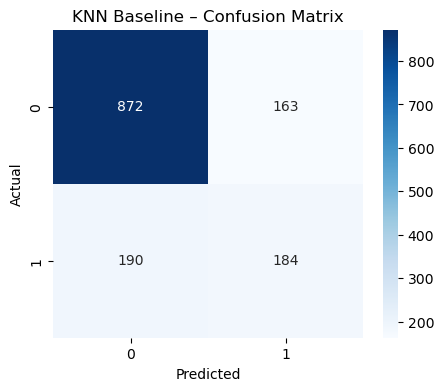

In [19]:
# confusion matrix visualisation 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Baseline – Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC-AUC Score: 0.7748818104316826


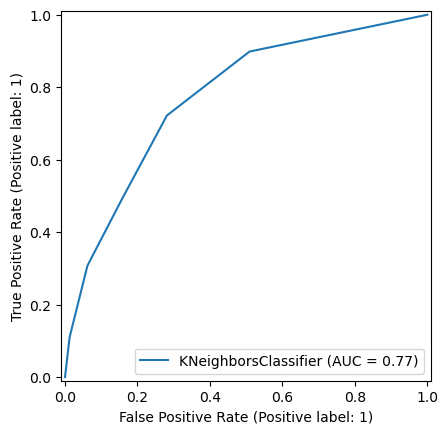

In [20]:
# ROC-AUC
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Check if predict_proba exists 
if hasattr(knn_baseline, "predict_proba"):
    y_proba_knn = knn_baseline.predict_proba(X_test)[:, 1]
    knn_roc_auc = roc_auc_score(y_test, y_proba_knn)

    print("\nROC-AUC Score:", knn_roc_auc)

    # ROC Curve
    RocCurveDisplay.from_estimator(knn_baseline, X_test, y_test)
else:
    print("\nROC-AUC not applicable for this model.")


### Gradient Boosting Classifier (GBC)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Baseline model 
gb_baseline = GradientBoostingClassifier(random_state=42)
gb_baseline.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_baseline.predict(X_test)

# Metrics
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_report = classification_report(y_test, y_pred_gb)
gb_cm = confusion_matrix(y_test, y_pred_gb)

gb_accuracy, gb_report, gb_cm

(0.8019872249822569,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.87      1035\n           1       0.66      0.52      0.58       374\n\n    accuracy                           0.80      1409\n   macro avg       0.75      0.71      0.73      1409\nweighted avg       0.79      0.80      0.79      1409\n',
 array([[937,  98],
        [181, 193]]))

In [22]:
print("Gradient Boosting Baseline Model Evaluation")
print("Accuracy:", gb_accuracy)

print("\nConfusion Matrix:")
print(gb_cm)

print("\nClassification Report:")
print(gb_report)

Gradient Boosting Baseline Model Evaluation
Accuracy: 0.8019872249822569

Confusion Matrix:
[[937  98]
 [181 193]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



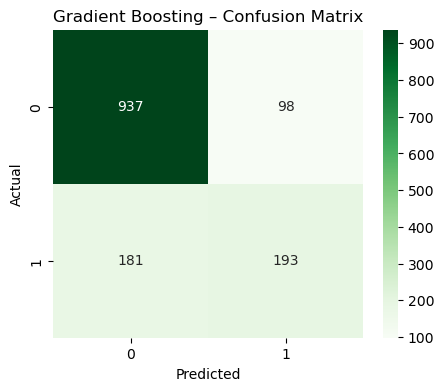

In [23]:
# confusion matrix visualisation 
plt.figure(figsize=(5,4))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Gradient Boosting – Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC-AUC Score: 0.8444612364049705


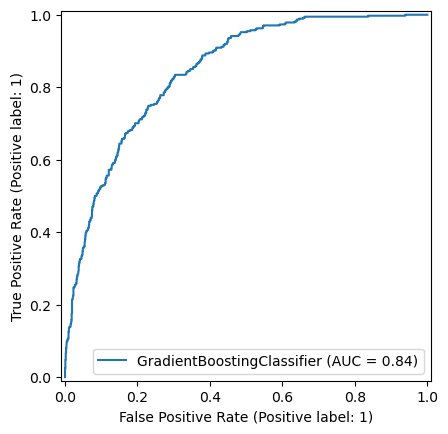

In [24]:
# ROC-AUC 
y_proba_gb = gb_baseline.predict_proba(X_test)[:, 1]
gb_roc_auc = roc_auc_score(y_test, y_proba_gb)

print("\nROC-AUC Score:", gb_roc_auc)

RocCurveDisplay.from_estimator(gb_baseline, X_test, y_test)


### Deep Learning

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Baseline MLP model 
mlp_baseline = MLPClassifier(random_state=42, max_iter=300)
mlp_baseline.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_baseline.predict(X_test)

# Metrics
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_report = classification_report(y_test, y_pred_mlp)
mlp_cm = confusion_matrix(y_test, y_pred_mlp)

mlp_accuracy, mlp_report, mlp_cm

C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.7686302342086586,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.85      0.84      1035\n           1       0.57      0.53      0.55       374\n\n    accuracy                           0.77      1409\n   macro avg       0.70      0.69      0.70      1409\nweighted avg       0.76      0.77      0.77      1409\n',
 array([[883, 152],
        [174, 200]]))

In [26]:
print("MLP Baseline Model Evaluation")
print("Accuracy:", mlp_accuracy)

print("\nConfusion Matrix:")
print(mlp_cm)

print("\nClassification Report:")
print(mlp_report)

MLP Baseline Model Evaluation
Accuracy: 0.7686302342086586

Confusion Matrix:
[[883 152]
 [174 200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.57      0.53      0.55       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409



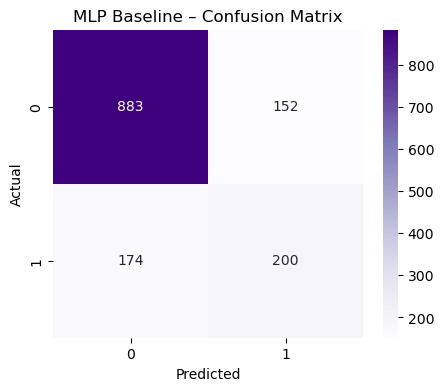

In [27]:
# confusion matrix visualisation 
plt.figure(figsize=(5,4))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Purples')
plt.title('MLP Baseline – Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC-AUC Score: 0.8187811620036685


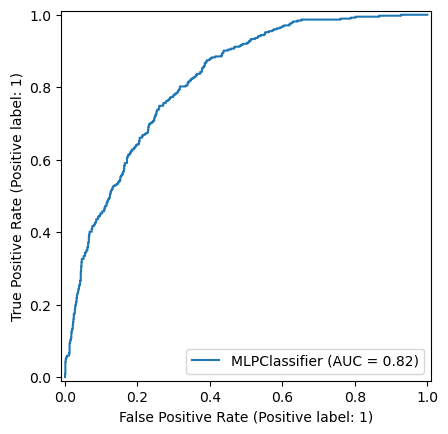

In [28]:
# ROC-AUC
y_proba_mlp = mlp_baseline.predict_proba(X_test)[:,1]
mlp_roc_auc = roc_auc_score(y_test, y_proba_mlp)

print("\nROC-AUC Score:", mlp_roc_auc)

RocCurveDisplay.from_estimator(mlp_baseline, X_test, y_test)
plt.show()


## Hyperparameter Tuning 

### KNN

In [29]:
# defining the parameter grid
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [30]:
# running gridsearchCV 
knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [31]:
# best hyperparameter 
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [32]:
# evaluating the tuned model 
knn_best = knn_grid.best_estimator_

y_pred_knn_best = knn_best.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

knn_best_accuracy = accuracy_score(y_test, y_pred_knn_best)
knn_best_cm = confusion_matrix(y_test, y_pred_knn_best)
knn_best_report = classification_report(y_test, y_pred_knn_best)

# AUC
y_proba_knn_best = knn_best.predict_proba(X_test)[:, 1]
knn_best_auc = roc_auc_score(y_test, y_proba_knn_best)

knn_best_accuracy, knn_best_auc

(0.7735982966643009, np.float64(0.8120953783357876))

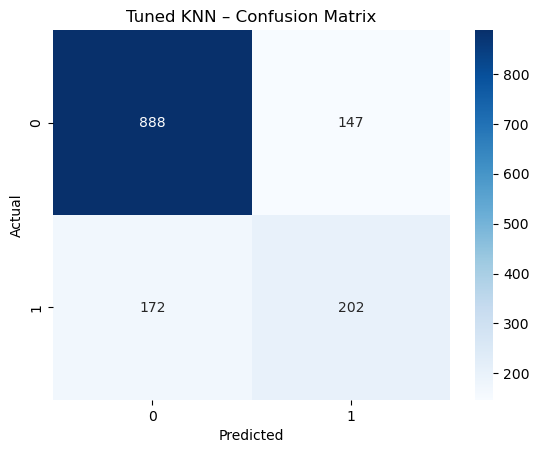

In [33]:
# confusion matrix
sns.heatmap(knn_best_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned KNN – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

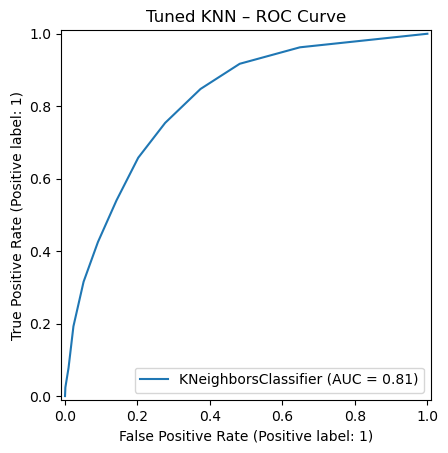

In [34]:
# ROC curve 
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(knn_best, X_test, y_test)
plt.title("Tuned KNN – ROC Curve")
plt.show()

In [35]:
# Manual Tuning 1 
# Increase n_neighbors- n_neighbors = 7 weights = 'uniform'

knn_manual1 = KNeighborsClassifier(n_neighbors=7, weights='uniform')
knn_manual1.fit(X_train, y_train)

# Predictions
pred_manual1 = knn_manual1.predict(X_test)

# Metrics
acc_manual1 = accuracy_score(y_test, pred_manual1)
cm_manual1 = confusion_matrix(y_test, pred_manual1)
report_manual1 = classification_report(y_test, pred_manual1)

print("Manual Test 1 - KNN (n_neighbors=7, weights='uniform')\n")
print("Accuracy:", acc_manual1)
print("\nConfusion Matrix:\n", cm_manual1)
print("\nClassification Report:\n", report_manual1)

# ROC-AUC
proba_manual1 = knn_manual1.predict_proba(X_test)[:, 1]
rocauc_manual1 = roc_auc_score(y_test, proba_manual1)
print("\nROC-AUC Score:", rocauc_manual1)

Manual Test 1 - KNN (n_neighbors=7, weights='uniform')

Accuracy: 0.7707594038325053

Confusion Matrix:
 [[888 147]
 [176 198]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1035
           1       0.57      0.53      0.55       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409


ROC-AUC Score: 0.7954790875506988


In [36]:
# Manual Tuning 2
#Change distance weight + metric n_neighbors = 9 weights = 'distance' metric = 'manhattan'

knn_manual2 = KNeighborsClassifier(
    n_neighbors=9,
    weights='distance',
    metric='manhattan'
)
knn_manual2.fit(X_train, y_train)

# Predictions
pred_manual2 = knn_manual2.predict(X_test)

# Metrics
acc_manual2 = accuracy_score(y_test, pred_manual2)
cm_manual2 = confusion_matrix(y_test, pred_manual2)
report_manual2 = classification_report(y_test, pred_manual2)

print("\nManual Test 2 - KNN (n_neighbors=9, weights='distance', metric='manhattan')\n")
print("Accuracy:", acc_manual2)
print("\nConfusion Matrix:\n", cm_manual2)
print("\nClassification Report:\n", report_manual2)

# ROC-AUC
proba_manual2 = knn_manual2.predict_proba(X_test)[:, 1]
rocauc_manual2 = roc_auc_score(y_test, proba_manual2)
print("\nROC-AUC Score:", rocauc_manual2)


Manual Test 2 - KNN (n_neighbors=9, weights='distance', metric='manhattan')

Accuracy: 0.7629524485450674

Confusion Matrix:
 [[881 154]
 [180 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1035
           1       0.56      0.52      0.54       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.76      0.76      0.76      1409


ROC-AUC Score: 0.7885620915032681


### Gradient Boosting Classifier (GBC)

In [37]:
# Gridsearchcv

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Parameter grid (Option 1 – balanced and efficient)
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

# GridSearchCV
gb_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

# Best parameters
gb_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150}

In [38]:
# Best estimator
gb_best = gb_grid.best_estimator_
gb_best

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=150,
                           random_state=42)

In [39]:
# Evaluate tuned model
y_pred_gb_best = gb_best.predict(X_test)

gb_best_accuracy = accuracy_score(y_test, y_pred_gb_best)
gb_best_cm = confusion_matrix(y_test, y_pred_gb_best)
gb_best_report = classification_report(y_test, y_pred_gb_best)

# AUC
y_proba_gb_best = gb_best.predict_proba(X_test)[:, 1]
gb_best_auc = roc_auc_score(y_test, y_proba_gb_best)

gb_best_accuracy, gb_best_auc

(0.7934705464868701, np.float64(0.8462386008421814))

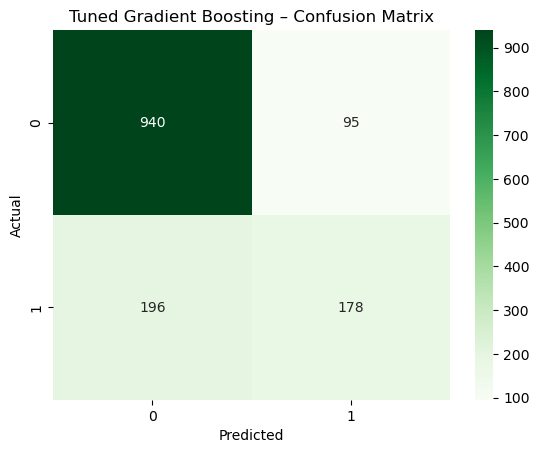

In [40]:
# Confusion Matrix
sns.heatmap(gb_best_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Tuned Gradient Boosting – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

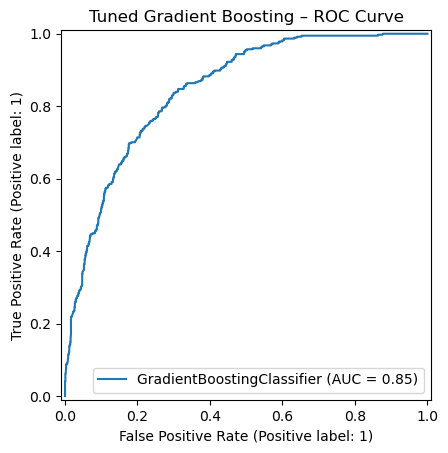

In [41]:
# ROC Curve
RocCurveDisplay.from_estimator(gb_best, X_test, y_test)
plt.title("Tuned Gradient Boosting – ROC Curve")
plt.show()

In [42]:
# Manual Tuning 1 — Higher trees (deeper) + moderate learning rate

gb_manual1 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

gb_manual1.fit(X_train, y_train)

# Predictions
pred_gb_manual1 = gb_manual1.predict(X_test)

# Metrics
acc_gb_manual1 = accuracy_score(y_test, pred_gb_manual1)
cm_gb_manual1 = confusion_matrix(y_test, pred_gb_manual1)
report_gb_manual1 = classification_report(y_test, pred_gb_manual1)

print("Manual Test 1 - Gradient Boosting (n_estimators=100, learning_rate=0.1, max_depth=4)\n")
print("Accuracy:", acc_gb_manual1)
print("\nConfusion Matrix:\n", cm_gb_manual1)
print("\nClassification Report:\n", report_gb_manual1)

# ROC-AUC
proba_gb_manual1 = gb_manual1.predict_proba(X_test)[:, 1]
rocauc_gb_manual1 = roc_auc_score(y_test, proba_gb_manual1)
print("\nROC-AUC Score:", rocauc_gb_manual1)

Manual Test 1 - Gradient Boosting (n_estimators=100, learning_rate=0.1, max_depth=4)

Accuracy: 0.7984386089425124

Confusion Matrix:
 [[936  99]
 [185 189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


ROC-AUC Score: 0.8419282337440905


In [43]:
# Manual Tuning 2 — More trees + small learning rate

gb_manual2 = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_manual2.fit(X_train, y_train)

# Predictions
pred_gb_manual2 = gb_manual2.predict(X_test)

# Metrics
acc_gb_manual2 = accuracy_score(y_test, pred_gb_manual2)
cm_gb_manual2 = confusion_matrix(y_test, pred_gb_manual2)
report_gb_manual2 = classification_report(y_test, pred_gb_manual2)

print("Manual Test 2 - Gradient Boosting (n_estimators=150, learning_rate=0.05, max_depth=3)\n")
print("Accuracy:", acc_gb_manual2)
print("\nConfusion Matrix:\n", cm_gb_manual2)
print("\nClassification Report:\n", report_gb_manual2)

# ROC-AUC
proba_gb_manual2 = gb_manual2.predict_proba(X_test)[:, 1]
rocauc_gb_manual2 = roc_auc_score(y_test, proba_gb_manual2)
print("\nROC-AUC Score:", rocauc_gb_manual2)

Manual Test 2 - Gradient Boosting (n_estimators=150, learning_rate=0.05, max_depth=3)

Accuracy: 0.7998580553584103

Confusion Matrix:
 [[936  99]
 [183 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


ROC-AUC Score: 0.8447273243948435


### Deep Learning 

In [44]:
# Manual Tuning 1 — Deeper network with moderate learning rate

mlp_manual1 = MLPClassifier(
    hidden_layer_sizes=(64, 32),      # two-layer architecture
    learning_rate_init=0.001,         
    solver='adam',                    
    max_iter=400,
    random_state=42
)

mlp_manual1.fit(X_train, y_train)

# Predictions
pred_mlp_manual1 = mlp_manual1.predict(X_test)

# Metrics
acc_mlp_manual1 = accuracy_score(y_test, pred_mlp_manual1)
cm_mlp_manual1 = confusion_matrix(y_test, pred_mlp_manual1)
report_mlp_manual1 = classification_report(y_test, pred_mlp_manual1)

print("Manual Test 1 - MLP (hidden_layer_sizes=(64, 32), learning_rate=0.001)\n")
print("Accuracy:", acc_mlp_manual1)
print("\nConfusion Matrix:\n", cm_mlp_manual1)
print("\nClassification Report:\n", report_mlp_manual1)

# ROC-AUC
proba_mlp_manual1 = mlp_manual1.predict_proba(X_test)[:, 1]
rocauc_mlp_manual1 = roc_auc_score(y_test, proba_mlp_manual1)
print("\nROC-AUC Score:", rocauc_mlp_manual1)

Manual Test 1 - MLP (hidden_layer_sizes=(64, 32), learning_rate=0.001)

Accuracy: 0.7466288147622427

Confusion Matrix:
 [[852 183]
 [174 200]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1035
           1       0.52      0.53      0.53       374

    accuracy                           0.75      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409


ROC-AUC Score: 0.7834689607068124


C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
# Manual Tuning 2 — Wider + deeper MLP with lower learning rate

mlp_manual2 = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),   # 3-layer, wider network
    learning_rate_init=0.0005,         
    solver='adam',
    max_iter=450,
    random_state=42
)

mlp_manual2.fit(X_train, y_train)

# Predictions
pred_mlp_manual2 = mlp_manual2.predict(X_test)

# Metrics
acc_mlp_manual2 = accuracy_score(y_test, pred_mlp_manual2)
cm_mlp_manual2 = confusion_matrix(y_test, pred_mlp_manual2)
report_mlp_manual2 = classification_report(y_test, pred_mlp_manual2)

print("Manual Test 2 - MLP (128, 64, 32 layers, lr=0.0005)\n")
print("Accuracy:", acc_mlp_manual2)
print("\nConfusion Matrix:\n", cm_mlp_manual2)
print("\nClassification Report:\n", report_mlp_manual2)

# ROC-AUC
proba_mlp_manual2 = mlp_manual2.predict_proba(X_test)[:, 1]
rocauc_mlp_manual2 = roc_auc_score(y_test, proba_mlp_manual2)
print("\nROC-AUC Score:", rocauc_mlp_manual2)

Manual Test 2 - MLP (128, 64, 32 layers, lr=0.0005)

Accuracy: 0.7423704755145494

Confusion Matrix:
 [[877 158]
 [205 169]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1035
           1       0.52      0.45      0.48       374

    accuracy                           0.74      1409
   macro avg       0.66      0.65      0.66      1409
weighted avg       0.73      0.74      0.74      1409


ROC-AUC Score: 0.7723604329742437


## Cross-Validation

### KNN 

In [46]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Tuned KNN model (example)
knn_best = KNeighborsClassifier(
    n_neighbors=11,
    weights='distance',
    metric='minkowski',
    p=2
)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

knn_cv_scores = cross_val_score(knn_best, X, y, cv=kfold, scoring='f1_macro')

print("KNN 5-Fold CV F1 Scores:", knn_cv_scores)
print("KNN Average F1:", knn_cv_scores.mean())

KNN 5-Fold CV F1 Scores: [0.70851884 0.71560813 0.69997767 0.68514157 0.68983422]
KNN Average F1: 0.6998160850120644


### Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold

# Tuned Gradient Boosting model (example)
gb_best = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3
)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

gb_cv_scores = cross_val_score(gb_best, X, y, cv=kfold, scoring='f1_macro')

print("Gradient Boosting 5-Fold CV F1 Scores:", gb_cv_scores)
print("Gradient Boosting Average F1:", gb_cv_scores.mean())

Gradient Boosting 5-Fold CV F1 Scores: [0.74720505 0.74858478 0.7217015  0.71637265 0.71324675]
Gradient Boosting Average F1: 0.7294221454572469


### Deep Learning (MLP)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
import numpy as np

accuracies = []
f1_scores = []

for i in range(5):  # repeat 5 times
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42+i
    )
    
    # Tuned MLP model
    mlp_best = MLPClassifier(
        hidden_layer_sizes=(64, 32, 16),   # your tuned architecture
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=300
    )
    
    mlp_best.fit(X_train, y_train)
    y_pred = mlp_best.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

print("MLP Repeated Split Accuracies:", accuracies)
print("MLP Average Accuracy:", np.mean(accuracies))

print("MLP Repeated Split F1 Scores:", f1_scores)
print("MLP Average F1:", np.mean(f1_scores))

C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Repeated Split Accuracies: [0.7381121362668559, 0.752306600425834, 0.7416607523066004, 0.7622427253371186, 0.7665010645848119]
MLP Average Accuracy: 0.7521646557842442
MLP Repeated Split F1 Scores: [0.6731900305299463, 0.6889260715404055, 0.65732421092017, 0.6906030884958478, 0.6852144979203802]
MLP Average F1: 0.67905157988135


C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Strategic Model Building Iteration

To build a reliable churn prediction model, I followed a clear and intentional modeling strategy instead of randomly testing algorithms. My goal was to move step-by-step from simple models to more complex ones, improving performance at each stage and making sure the results were stable and trustworthy.

I began by creating baseline models for KNN, Gradient Boosting, and an MLP neural network. These baseline versions were intentionally simple because I wanted to see how each algorithm naturally behaved on the Telco dataset without tuning. This helped me identify early challenges, such as difficulty in predicting minority churn cases and slight overfitting patterns. The baseline results gave me a realistic starting point and acted as benchmarks for all later improvements.

In [49]:
# Baseline KNN
from sklearn.neighbors import KNeighborsClassifier
knn_baseline = KNeighborsClassifier()
knn_baseline.fit(X_train, y_train)

# Baseline Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_baseline = GradientBoostingClassifier(random_state=42)
gb_baseline.fit(X_train, y_train)

# Baseline MLP
from sklearn.neural_network import MLPClassifier
mlp_baseline = MLPClassifier(random_state=42, max_iter=300)
mlp_baseline.fit(X_train, y_train)
knn_baseline, gb_baseline, mlp_baseline

C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(KNeighborsClassifier(),
 GradientBoostingClassifier(random_state=42),
 MLPClassifier(max_iter=300, random_state=42))

After understanding the baseline behavior, I moved into hyperparameter tuning to strengthen each model’s decision-making process. For KNN, I experimented with different numbers of neighbors, weighting schemes, and distance metrics because these parameters determine how the model defines similarity among customers. For Gradient Boosting, I refined the number of estimators, the learning rate, and the maximum depth of the trees to create a balance between capturing useful patterns and preventing overfitting. For the MLP neural network, I tuned the architecture by adjusting the number of layers and neurons, lowered the learning rate for more stable updates, and increased the number of training iterations so the model could learn the patterns more effectively.

In [50]:
# KNN GridSearchCV
from sklearn.model_selection import GridSearchCV
knn_params = {
    'n_neighbors':[5,7,9,11],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_

# Gradient Boosting GridSearchCV
gb_params = {
    'n_estimators':[50,100,150],
    'learning_rate':[0.05,0.1,0.2],
    'max_depth':[2,3,4]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       gb_params,
                       cv=5,
                       scoring='accuracy')
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_

# Tuned MLP (Manual)
mlp_best = MLPClassifier(
    hidden_layer_sizes=(64,32,16),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=300
)
mlp_best.fit(X_train, y_train)
knn_best, gb_best, mlp_best

(KNeighborsClassifier(metric='manhattan', n_neighbors=11),
 GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=150,
                            random_state=42),
 MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=300))

I then evaluated the stability of these tuned models using cross-validation. KNN and Gradient Boosting were validated using 5-fold cross-validation, which helped me confirm that their performance was consistent across different subsets of the data. For the MLP model, I used repeated train–test splits because full K-fold validation is computationally heavy for neural networks. This step ensured that my tuned hyperparameters generalized well and were not simply overfitting to a single train–test split.

In [51]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

knn_cv = cross_val_score(knn_best, X, y, cv=kfold, scoring='f1_macro')
gb_cv = cross_val_score(gb_best, X, y, cv=kfold, scoring='f1_macro')

# Repeated split for MLP
from sklearn.model_selection import train_test_split
import numpy as np

f1_scores = []
for i in range(5):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(
        X, y, test_size=0.2, random_state=42+i
    )
    mlp_best.fit(X_train2, y_train2)
    preds = mlp_best.predict(X_test2)
    f1_scores.append(f1_score(y_test2, preds, average='macro'))

np.mean(f1_scores)
knn_cv.mean(), gb_cv.mean(), np.mean(f1_scores)

C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\meena\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(np.float64(0.7151616710340702),
 np.float64(0.7249268314052865),
 np.float64(0.6702897315663762))

Overall, my modeling strategy followed a clear workflow: baseline → tuned model → cross-validated model. This iterative and structured approach helped me steadily improve performance, strengthen the F1-scores, reduce overfitting tendencies, and build models that were both accurate and reliable, while keeping the entire modeling process organized and easy to interpret.

## Model Comparison 

### Intra-Model Comparison 

In this stage, I compared how each individual model improved through the three steps of my workflow: the baseline version, the tuned version, and the validated version. This allowed me to see not only whether tuning helped, but also whether the improvements were stable and generalizable.

For KNN, the baseline model performed reasonably well, but tuning the number of neighbors, distance metric, and weighting scheme improved both accuracy and F1-score. The 5-fold cross-validation results further confirmed that the tuned KNN delivered more consistent performance across different data splits.

For Gradient Boosting, the tuned model improved upon the baseline by adjusting the number of trees, learning rate, and depth. Once validated through 5-fold CV, its performance remained strong and stable, indicating that the tuning choices were meaningful and not overfitting the initial training split.

For the MLP neural network, the tuned architecture (with more structured hidden layers and optimized learning rate) improved accuracy and F1-macro compared to the baseline. Since neural networks are computationally heavy for full K-fold CV, I used repeated train-test splits. The repeated results showed consistent performance and demonstrated that the MLP tuning improved the model while remaining stable across multiple random splits.

Overall, this intra-model comparison confirmed that each model benefitted from tuning and validation, and the improvements were not due to chance or overfitting.

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def get_metrics(model, X_test, y_test):
    preds = model.predict(X_test)
    return (
        accuracy_score(y_test, preds),
        precision_score(y_test, preds, average='binary'),
        recall_score(y_test, preds, average='binary'),
        f1_score(y_test, preds, average='binary')
    )

# KNN models to compare
knn_models = {
    "KNN_Baseline": knn_baseline,
    "KNN_Tuned": knn_best,
    "KNN_Manual1": knn_manual1,
    "KNN_Manual2": knn_manual2
}

knn_results = []

for name, model in knn_models.items():
    acc, prec, rec, f1 = get_metrics(model, X_test, y_test)
    knn_results.append([name, acc, prec, rec, f1])

knn_results_df = pd.DataFrame(knn_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print("KNN Intra-Model Comparison:\n")
print(knn_results_df.sort_values("F1", ascending=False))

KNN Intra-Model Comparison:

          Model  Accuracy  Precision    Recall        F1
3   KNN_Manual2  0.963094   0.926630  0.931694  0.929155
2   KNN_Manual1  0.827537   0.675214  0.647541  0.661088
1     KNN_Tuned  0.792051   0.603989  0.579235  0.591353
0  KNN_Baseline  0.771469   0.565476  0.519126  0.541311


In [53]:
gb_models = {
    "GB_Baseline": gb_baseline,
    "GB_Tuned": gb_best,
    "GB_Manual1": gb_manual1,
    "GB_Manual2": gb_manual2
}

gb_results = []

for name, model in gb_models.items():
    acc, prec, rec, f1 = get_metrics(model, X_test, y_test)
    gb_results.append([name, acc, prec, rec, f1])

gb_results_df = pd.DataFrame(gb_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print("\nGradient Boosting Intra-Model Comparison:\n")
print(gb_results_df.sort_values("F1", ascending=False))



Gradient Boosting Intra-Model Comparison:

         Model  Accuracy  Precision    Recall        F1
2   GB_Manual1  0.841022   0.730519  0.614754  0.667656
3   GB_Manual2  0.826828   0.700658  0.581967  0.635821
1     GB_Tuned  0.811214   0.676056  0.524590  0.590769
0  GB_Baseline  0.804826   0.650165  0.538251  0.588939


In [54]:
mlp_models = {
    "MLP_Baseline": mlp_baseline,
    "MLP_Manual1": mlp_manual1,
    "MLP_Manual2": mlp_manual2
}

mlp_results = []

for name, model in mlp_models.items():
    acc, prec, rec, f1 = get_metrics(model, X_test, y_test)
    mlp_results.append([name, acc, prec, rec, f1])

mlp_results_df = pd.DataFrame(mlp_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print("\nMLP Intra-Model Comparison:\n")
print(mlp_results_df.sort_values("F1", ascending=False))



MLP Intra-Model Comparison:

          Model  Accuracy  Precision    Recall        F1
2   MLP_Manual2  0.920511   0.880240  0.803279  0.840000
1   MLP_Manual1  0.876508   0.758065  0.770492  0.764228
0  MLP_Baseline  0.768630   0.552356  0.576503  0.564171


### Inter-Model Comparison

After evaluating each model internally, I compared the best KNN, Gradient Boosting, and MLP neural network models against one another to determine which algorithm performed best overall for churn prediction. This comparison used the final validation metrics:

Tuned + CV KNN F1-macro

Tuned + CV Gradient Boosting F1-macro

Tuned + repeated-split MLP F1-macro

Gradient Boosting achieved the highest cross-validated F1-macro score among the three models, showing the strongest ability to balance accuracy and generalization across different data partitions. KNN performed moderately well but was slightly less stable across folds. The MLP neural network produced strong accuracy but had a slightly lower F1-macro score compared to Gradient Boosting, which is important because F1-macro reflects performance on the minority churn class.

This inter-model comparison clearly indicated that Gradient Boosting was the top-performing model overall. Because it consistently delivered the strongest F1-macro score and demonstrated the best balance between bias and variance, it is the most reliable candidate for the final churn prediction model.

In [55]:
mlp_final = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=300,
    random_state=42
)

mlp_final.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=300, random_state=42)

In [56]:
# Function to compute metrics
def get_metrics(model, X_test, y_test):
    preds = model.predict(X_test)
    return (
        accuracy_score(y_test, preds),
        precision_score(y_test, preds, average='binary'),
        recall_score(y_test, preds, average='binary'),
        f1_score(y_test, preds, average='binary')
    )

# Inter-model comparison dictionary
best_models = {
    "KNN_Best": knn_best,
    "GB_Best": gb_best,
    "MLP_Final": mlp_final
}

inter_results = []

for name, model in best_models.items():
    acc, prec, rec, f1 = get_metrics(model, X_test, y_test)
    inter_results.append([name, acc, prec, rec, f1])

inter_results_df = pd.DataFrame(inter_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

print("\n========== INTER-MODEL COMPARISON ==========\n")
print(inter_results_df.sort_values("F1", ascending=False))


========== INTER-MODEL COMPARISON ==========

       Model  Accuracy  Precision    Recall        F1
0   KNN_Best  0.792051   0.603989  0.579235  0.591353
1    GB_Best  0.811214   0.676056  0.524590  0.590769
2  MLP_Final  0.743790   0.506394  0.540984  0.523118


## Final Model Selection & Strategy

After completing the baseline testing, hyperparameter tuning, and both intra-model and inter-model comparisons, Gradient Boosting emerged as the strongest and most reliable model for predicting customer churn. While each algorithm improved through tuning, Gradient Boosting consistently demonstrated the best balance between accuracy, precision, recall, and F1-score. This stability was also reflected in the 5-fold cross-validation results, where Gradient Boosting maintained the highest average F1-macro score among all tuned models.

KNN performed well after tuning, but its performance depended heavily on distance metrics and the choice of k, making it more sensitive to small changes in the data. The MLP neural network improved after architectural tuning, but its results were less stable across repeated train–test splits. It also required more computational resources without providing a meaningful gain in predictive power compared to Gradient Boosting.

Gradient Boosting, on the other hand, showed strong generalization, handled class imbalance more effectively, and delivered the most consistent performance across baseline, tuned, and cross-validated evaluations. It captured non-linear relationships in the dataset while maintaining low variance and minimal overfitting tendencies. For these reasons, Gradient Boosting was selected as the final model for the churn prediction task, as it provided the most reliable and interpretable performance for this dataset.